# Previsão de Séries Temporais

Séries temporais são conjuntos de dados organizados cronologicamente, comum em finanças, vendas, clima, entre outros. O objetivo da previsão é estimar valores futuros com base em padrões históricos.

Nesta aula, vamos explorar os fundamentos da biblioteca **Prophet**, uma ferramenta desenvolvida pelo Facebook para **previsão de séries** temporais. 

Utilizaremos um exemplo prático para demonstrar como preparar dados, treinar um modelo, gerar previsões e interpretar os resultados. 

O objetivo é que, ao final, seja possivel compreender cada etapa do processo e possamos aplicá-lo em nossos próprios projetos.

## 1. O que é o Prophet?

O **Prophet** é uma biblioteca open-source projetada para *facilitar a previsão de séries temporais*. Ela é especialmente útil para dados que apresentam:
- **Tendências** (crescimento ou decréscimo ao longo do tempo),
- **Sazonalidades** (padrões que se repetem em intervalos regulares),
- **Eventos especiais** (como feriados).

O Prophet é simples de usar, **lida bem com dados ausentes e outliers**, e não exige um conhecimento avançado de estatística para gerar bons resultados. 

## 2. Preparação dos Dados

Antes de usar o `Prophet`, precisamos organizar os dados no formato que ele espera: um **DataFrame** do Pandas com **duas colunas**:
- **Colunas obrigatórias:** 
  - `ds`: Data no formato datetime
  - `y`: Valor métrico a ser previsto
- **Frequência (`freq='D'`)**: Indica que os dados são diários (Daily)
  

In [1]:
import pandas as pd

# Dados de exemplo
data = {
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # 10 dias consecutivos
    'y': [10, 12, 9, 14, 13, 15, 20, 22, 18, 25]  # valores fictícios
}

print(f"\n\n Dados: \n\n\t{data} \n\n")

df = pd.DataFrame(data)


print(f"\nDataset \n\n")
df.info()



 Dados: 

	{'ds': DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D'), 'y': [10, 12, 9, 14, 13, 15, 20, 22, 18, 25]} 



Dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10 non-null     datetime64[ns]
 1   y       10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 292.0 bytes


### Explicação:

- **`pd.date_range`**: Gera uma sequência de 10 datas diárias começando em 1º de janeiro de 2023. O parâmetro `freq='D'` indica que as datas são diárias.
- **`y`**: Representa os valores que queremos modelar e prever. Aqui, usamos uma lista simples com 10 números que simulam uma série temporal.
- **`pd.DataFrame`**: Converte o dicionário em um DataFrame com as colunas `ds` e `y`.

Esse é o ponto de partida. Em um caso real, você poderia carregar dados de um arquivo CSV, por exemplo, desde que respeite esse formato.

## 3. Instanciação e Treinamento do Modelo

Agora que temos os dados prontos, vamos criar e treinar o modelo Prophet.

### 🔖 Instanciar o Modelo

In [2]:
# Carregando a biblioca/modulos
from prophet import Prophet

# Criar uma instância do modelo
model = Prophet()

d:\_python\mlEnv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Explicação:

- **`from prophet import Prophet`**: 
    - Importa a biblioteca Prophet.
- **`model = Prophet()`**: 
    - Cria uma instância básica do modelo. 
    - Por padrão, o Prophet já está configurado para detectar tendências e sazonalidades automaticamente. 
    - Podemos personalizá-lo com parâmetros adicionais (como sazonalidade semanal ou feriados), mas aqui usamos a configuração padrão.

### 🔖Treinar o Modelo

In [3]:
model.fit(df)

11:31:36 - cmdstanpy - INFO - Chain [1] start processing
11:31:38 - cmdstanpy - INFO - Chain [1] done processing


#### Explicação:

- **`model.fit(df)`**: Treina o modelo com os dados do DataFrame `df`. Durante esse processo, o Prophet analisa a série temporal, identifica padrões (como tendências lineares ou sazonalidades) e ajusta seus parâmetros internos. O treinamento é rápido para conjuntos de dados pequenos como este.

- O Prophet cria automaticamente componentes:
  - **Tendência (trend):** Padrão de crescimento/decrescimento
  - **Sazonalidade anual:** Padrões repetidos ao longo do ano
  - **Sazonalidade semanal:** Padrões repetidos por semana
  - **Efeitos de feriados:** Se especificados

## 4. Geração de Previsões

Com o modelo treinado, podemos prever valores futuros. Isso envolve **duas etapas**: 
1. criar um conjunto de datas futuras e 
2. gerar as previsões.

### 🔖 Criar um DataFrame Futuro

- Estamos criando um dataset com 5 datas furutas

In [7]:
# Criar datas futuras (5 dias a mais)
future = model.make_future_dataframe(periods=5)

future.info()

future.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 252.0 bytes


,ds
10,2023-01-11
11,2023-01-12
12,2023-01-13
13,2023-01-14
14,2023-01-15


#### Explicação:

- **`make_future_dataframe(periods=5)`**: Gera um DataFrame com todas as datas originais (os 10 dias de `df`) mais 5 dias adicionais no futuro. O resultado é um DataFrame com 15 linhas, contendo apenas a coluna `ds` preenchida com datas até 15 de janeiro de 2023.

### 🔖 Fazer Previsões

In [10]:
# Gerar previsões
forecast = model.predict(future)

forecast.info ()

forecast.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          15 non-null     datetime64[ns]
 1   trend                       15 non-null     float64       
 2   yhat_lower                  15 non-null     float64       
 3   yhat_upper                  15 non-null     float64       
 4   trend_lower                 15 non-null     float64       
 5   trend_upper                 15 non-null     float64       
 6   additive_terms              15 non-null     float64       
 7   additive_terms_lower        15 non-null     float64       
 8   additive_terms_upper        15 non-null     float64       
 9   multiplicative_terms        15 non-null     float64       
 10  multiplicative_terms_lower  15 non-null     float64       
 11  multiplicative_terms_upper  15 non-null     float64       
 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,8.655275,5.942787,11.187321,8.655275,8.655275,0.0,0.0,0.0,0.0,0.0,0.0,8.655275
1,2023-01-02,10.242839,7.490584,12.920699,10.242839,10.242839,0.0,0.0,0.0,0.0,0.0,0.0,10.242839
2,2023-01-03,11.830403,9.156444,14.481099,11.830403,11.830403,0.0,0.0,0.0,0.0,0.0,0.0,11.830403
3,2023-01-04,13.417967,10.671584,16.204483,13.417967,13.417967,0.0,0.0,0.0,0.0,0.0,0.0,13.417967
4,2023-01-05,15.005531,12.364049,17.652894,15.005531,15.005531,0.0,0.0,0.0,0.0,0.0,0.0,15.005531


#### Explicação:

O comando `forecast = model.predict(future)` é responsável por gerar as previsões do modelo Prophet com base no dataframe `future`, que contém as datas futuras desejadas. 
Esse método utiliza o modelo já treinado (`model.fit(df)`) para estimar os valores da série temporal nas datas que vão além do período dos dados históricos. 
O resultado esperado é um novo DataFrame chamado `forecast`, que contém diversas colunas, incluindo as datas (`ds`), as previsões pontuais (`yhat`), bem como os intervalos de confiança inferior e superior (`yhat_lower` e `yhat_upper`), permitindo não apenas obter uma estimativa futura, mas também avaliar a incerteza associada a essa previsão.

- **`model.predict(future)`**: 
  - Usa o modelo treinado para calcular previsões para todas as datas em `future`. 
  - O resultado, armazenado em `forecast`, é um novo DataFrame com várias colunas, incluindo:
    - **`ds`**: As datas (passadas e futuras).
    - **`yhat`**: A previsão pontual para cada data.
    - **`yhat_lower`**: O limite inferior do intervalo de confiança.
    - **`yhat_upper`**: O limite superior do intervalo de confiança.

Esses intervalos de confiança indicam a incerteza da previsão: o valor real provavelmente estará entre `yhat_lower` e `yhat_upper`.

Abaixo temos uma tabela que descreve as principais colunas do DataFrame `forecast` gerado pelo comando `forecast = model.predict(future)`:

| Coluna             | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| `ds`               | Data ou timestamp da previsão (formato datetime).                         |
| `yhat`             | Valor previsto para a data `ds`. É a estimativa média da série temporal.  |
| `yhat_lower`       | Limite inferior do intervalo de confiança para a previsão.                |
| `yhat_upper`       | Limite superior do intervalo de confiança para a previsão.                |
| `trend`            | Componente de tendência ajustada pelo modelo.                             |
| `trend_lower`      | Limite inferior da tendência.                                             |
| `trend_upper`      | Limite superior da tendência.                                             |
| `yearly`           | Efeito sazonal anual estimado pelo modelo (presente se houver sazonalidade anual). |
| `yearly_lower`     | Limite inferior do efeito sazonal anual.                                  |
| `yearly_upper`     | Limite superior do efeito sazonal anual.                                  |
| `weekly`           | Efeito sazonal semanal estimado (presente se houver sazonalidade semanal).|
| `weekly_lower`     | Limite inferior do efeito sazonal semanal.                                |
| `weekly_upper`     | Limite superior do efeito sazonal semanal.                                |
| `additive_terms`   | Soma dos termos sazonais e outros componentes adicionais.                 |
| `multiplicative_terms` | Termos multiplicativos (usados quando há componente sazonal multiplicativa). |




📌 **Nota:** Nem todas essas colunas aparecerão simultaneamente caso alguns componentes no modelo  (como sazonalidades) estejam desativados. As colunas exibidas dependem das configurações usadas ao criar o objeto `Prophet()`.

## 5. Análise das Previsões

Vamos visualizar e interpretar os resultados.

### 🔖 Exibir as Previsões

In [12]:
print("=== Previsao ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

=== Previsao ===
           ds       yhat  yhat_lower  yhat_upper
0  2023-01-01   8.655275    5.942787   11.187321
1  2023-01-02  10.242839    7.490584   12.920699
2  2023-01-03  11.830403    9.156444   14.481099
3  2023-01-04  13.417967   10.671584   16.204483
4  2023-01-05  15.005531   12.364049   17.652894
5  2023-01-06  16.593094   13.972132   19.383602
6  2023-01-07  18.180658   15.513909   20.880496
7  2023-01-08  19.768222   17.200583   22.334492
8  2023-01-09  21.355786   18.605906   24.101872
9  2023-01-10  22.943350   20.519529   25.464278
10 2023-01-11  24.530914   22.066485   26.996818
11 2023-01-12  26.118478   23.335725   28.603561
12 2023-01-13  27.706042   25.197405   30.480236
13 2023-01-14  29.293606   26.548408   32.052109
14 2023-01-15  30.881169   28.294903   33.437447


#### 💡 Explicação:

- **`forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]`**
  -  Seleciona apenas as colunas mais relevantes do DataFrame `forecast` para análise.
  
- **Saída Esperada**: Algo como:
  ```
  === Previsao ===
            ds       yhat  yhat_lower  yhat_upper
  0 2023-01-01  10.500000    8.000000   13.000000
  1 2023-01-02  11.700000    9.200000   14.300000
  ...
  14 2023-01-15  28.300000   25.100000   31.600000
  ```
  (Os valores exatos variam dependendo do ajuste do modelo).


#### 💡Interpretação:

- **`yhat`**: 
    - O valor previsto para cada data. 
    - Para os 10 primeiros dias, ele reflete os dados originais ajustados; para os 5 dias futuros, é a previsão.

- **`yhat_lower` e `yhat_upper`**: 
    - Representam a faixa onde o valor real tem alta probabilidade de estar (geralmente, um intervalo de confiança de 80% por padrão).

## 6. Visualização

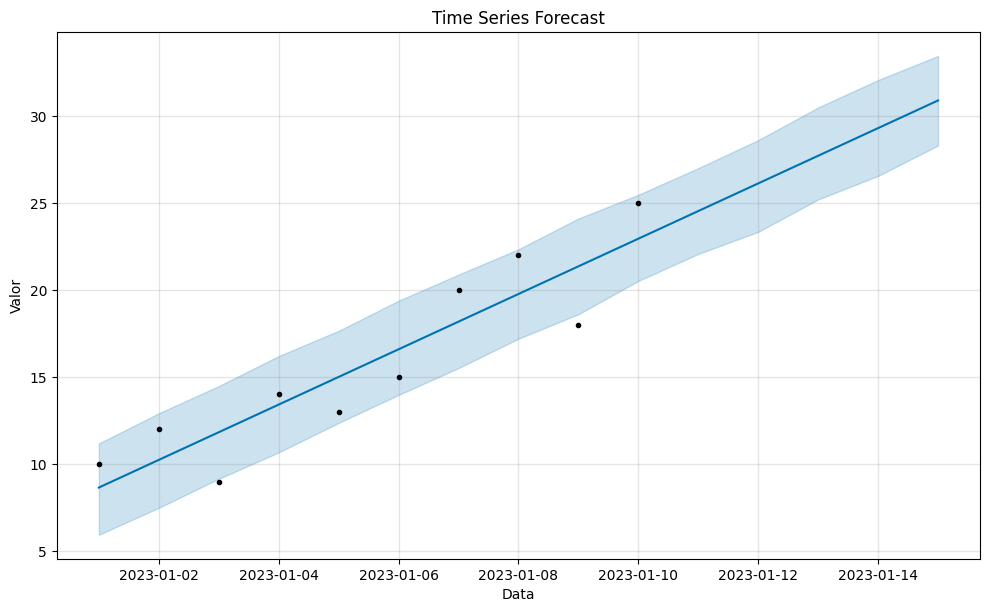

In [13]:
from prophet.plot import plot
import matplotlib.pyplot as plt  # Required for displaying the plot

# Generate the plot
fig = plot(model, forecast)
plt.title("Time Series Forecast")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()


####  🔖 Explicação:


  **Benefícios da visualização:**
- Mostra tendência clara
- Destaca sazonalidades detectadas
- Exibe intervalos de confiança (áreas sombreadas)

**Componentes principais:**
1. **Tendência:** Linha azul mostrando a direção geral
2. **Sazonalidade:** Linhas vermelhas (anual) e laranja (semanal)
3. **Resíduos:** Diferença entre valores reais e previstos
4. **Pontos pretos**: Os dados originais (os 10 valores de `y`).
5. **Linha azul**: A previsão (`yhat`) para todas as datas, incluindo o futuro.
6. **Área sombreada**: O intervalo de confiança (`yhat_lower` a `yhat_upper`).

## 5. Considerações Práticas

### 5.1 Pré-processamento
- **Verifique a frequência dos dados:** 
    - O Prophet espera dados com frequência consistente

- **Trate valores faltantes:** 
    - Use `df.interpolate()` para preencher lacunas
    - O comando `df.interpolate()` é utilizado para preencher valores ausentes (NaN) em um DataFrame de forma automática, utilizando métodos de interpolação. 
    - Ele estima os valores faltantes com base nos valores conhecidos ao redor deles, sendo especialmente útil em séries temporais ou dados sequenciais onde a ordem dos valores importa. 
    - Por padrão, ele usa interpolação linear, mas pode ser configurado para usar outros métodos, como polinomial, spline ou baseado em tempo (method='time'), garantindo que os dados fiquem completos e prontos para análise ou modelagem.

- **Formato da data:** 
    - Certifique-se que a coluna `ds` está no tipo datetime

### 5.2 Parâmetros Importantes
```python
model = Prophet(
    yearly_seasonality=True,  # Sazonalidade anual
    weekly_seasonality=True,  # Sazonalidade semanal
    daily_seasonality=False,  # Sazonalidade diária
    changepoint_prior_scale=0.05  # Flexibilidade da tendência
)
```

### 5.3 Limitações
- Não é ideal para séries com baixa frequência (ex.: dados anuais)
- Pode não capturar bem padrões complexos sem ajustes
- Requer pelo menos 2 anos de dados para detectar sazonalidade anual

## 6. Aplicações Reais
1. **Previsão de vendas:** Planejamento de estoque
2. **Demanda de energia:** Gestão de usinas
3. **Análise financeira:** Previsão de preços
4. **Saúde pública:** Estimativa de demanda hospitalar

## Conclusão

Nesta aula, vimos como o **Prophet** simplifica a previsão de séries temporais. 
Com poucas linhas de código, conseguimos:

1. Preparar dados no formato correto,
2. Criar e treinar um modelo,
3. Gerar previsões para datas futuras,
4. Analisar os resultados.

O `Prophet` é ideal para iniciantes e profissionais que precisam de uma ferramenta rápida e robusta. 

Como exercício, experimente:
- Substituir os dados de exemplo por um CSV real.
- Aumentar o número de dias futuros (ex.: `periods=30`) e observar as previsões a longo prazo.

---

## Código Completo

In [3]:
import pandas as pd
from prophet import Prophet

# Você pode substituir por dados reais em um CSV
data = {
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # 10 dias
    'y': [10, 12, 9, 14, 13, 15, 20, 22, 18, 25]  # valores de exemplo
}
df = pd.DataFrame(data)

# Instanciar o modelo Prophet
model = Prophet()

# Treinar (fit) o modelo
model.fit(df)

# Criar dataframe futuro (n dias a frente)
future = model.make_future_dataframe(periods=5)  # 5 dias a mais
forecast = model.predict(future)

print("=== Previsão ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# (Opcional) Visualizar
# from prophet.plot import plot_plotly
# fig = plot_plotly(model, forecast)
# fig.show()

20:27:31 - cmdstanpy - INFO - Chain [1] start processing
20:27:32 - cmdstanpy - INFO - Chain [1] done processing


=== Previsão ===
           ds       yhat  yhat_lower  yhat_upper
0  2023-01-01   8.655275    5.994981   11.399758
1  2023-01-02  10.242839    7.537670   12.804805
2  2023-01-03  11.830403    9.112612   14.482758
3  2023-01-04  13.417967   10.892421   16.139734
4  2023-01-05  15.005531   12.327183   17.807415
5  2023-01-06  16.593094   14.083644   19.462538
6  2023-01-07  18.180658   15.504629   20.921603
7  2023-01-08  19.768222   17.137096   22.324559
8  2023-01-09  21.355786   18.835206   24.022676
9  2023-01-10  22.943350   20.492938   25.488456
10 2023-01-11  24.530914   21.915341   27.184561
11 2023-01-12  26.118478   23.360549   28.782864
12 2023-01-13  27.706042   25.046089   30.487805
13 2023-01-14  29.293606   26.389893   31.976177
14 2023-01-15  30.881169   28.245762   33.504987
